### Importing modules

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', 50)

### Loading Data

In [3]:
battles = pd.read_csv('battles.csv')
char_deaths = pd.read_csv('character-deaths.csv')
char_pred = pd.read_csv('character-predictions.csv')

## Data Exploration and Wrangling

### Battles Exploration

In [4]:
# Battle Preview
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
# Battle info
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

We have a lot of missing values, let's look at the percentage for each columns.

In [6]:
for col in battles.columns:
    # missing = battles.shape[0] - battles[col].isna().sum()
    percent = (battles[col].isna().sum()/battles.shape[0]) * 100
    print(f'{col}: {percent}')

name: 0.0
year: 0.0
battle_number: 0.0
attacker_king: 5.263157894736842
defender_king: 7.894736842105263
attacker_1: 0.0
attacker_2: 73.68421052631578
attacker_3: 92.10526315789474
attacker_4: 94.73684210526315
defender_1: 2.631578947368421
defender_2: 94.73684210526315
defender_3: 100.0
defender_4: 100.0
attacker_outcome: 2.631578947368421
battle_type: 2.631578947368421
major_death: 2.631578947368421
major_capture: 2.631578947368421
attacker_size: 36.84210526315789
defender_size: 50.0
attacker_commander: 2.631578947368421
defender_commander: 26.31578947368421
summer: 2.631578947368421
location: 2.631578947368421
region: 0.0
note: 86.8421052631579


Let's look at unique attacker king and defender king, then look at the unique commander on both end.

In [7]:
print(battles.attacker_king.unique())
print(battles.defender_king.unique())
print(battles.attacker_1.unique())
print(battles.defender_1.unique())

['Joffrey/Tommen Baratheon' 'Robb Stark' 'Balon/Euron Greyjoy'
 'Stannis Baratheon' nan]
['Robb Stark' 'Joffrey/Tommen Baratheon' 'Balon/Euron Greyjoy'
 'Renly Baratheon' nan 'Mance Rayder' 'Stannis Baratheon']
['Lannister' 'Stark' 'Greyjoy' 'Bolton' 'Baratheon' 'Darry'
 'Brotherhood without Banners' 'Frey' 'Free folk' 'Brave Companions'
 'Bracken']
['Tully' 'Baratheon' 'Lannister' 'Darry' 'Stark' 'Greyjoy'
 'Brave Companions' 'Mallister' "Night's Watch" nan 'Tyrell' 'Blackwood'
 'Bolton']


Let's see the count of each attacker king and defender king

<AxesSubplot:>

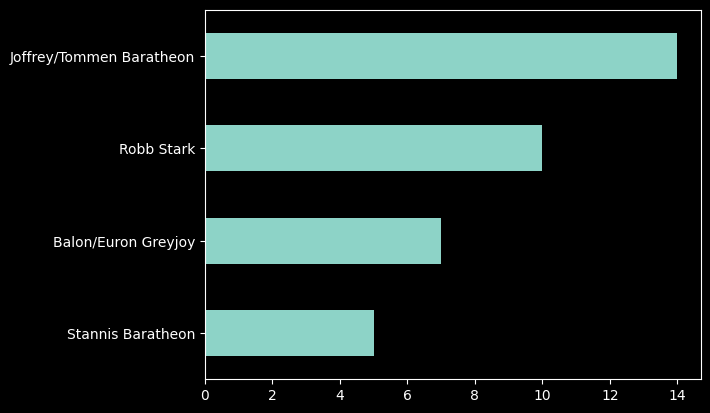

In [8]:
att_kg = battles['attacker_king'].value_counts(ascending=True)
att_kg.plot(kind='barh')

<AxesSubplot:>

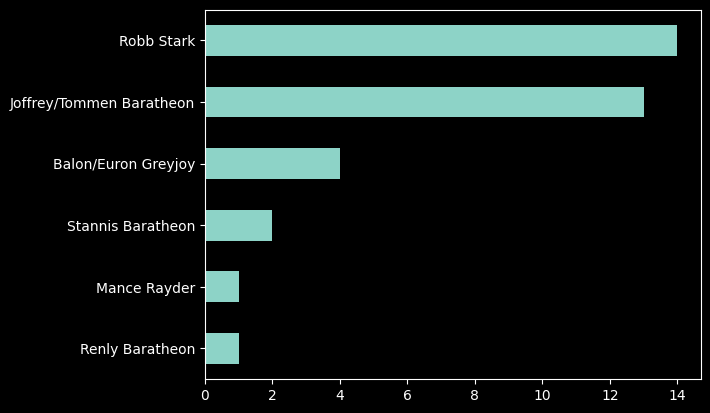

In [9]:
att_kg = battles['defender_king'].value_counts(ascending=True)
att_kg.plot(kind='barh')

Let's see how many times did each commander start an attack and how many times did each defend an attack using attacker 1 and defender 1 respectively

<AxesSubplot:>

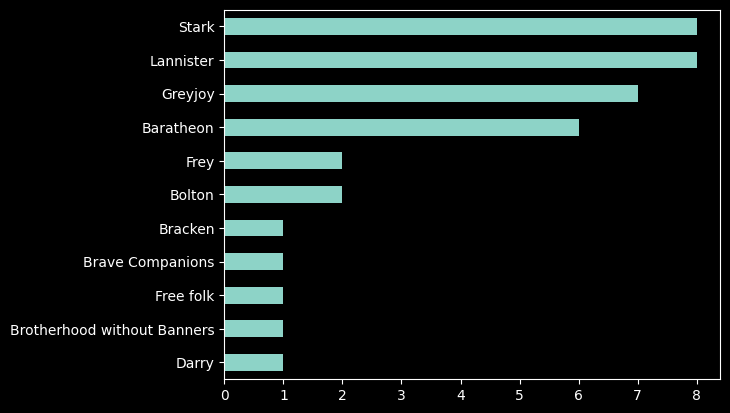

In [10]:
battles['attacker_1'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

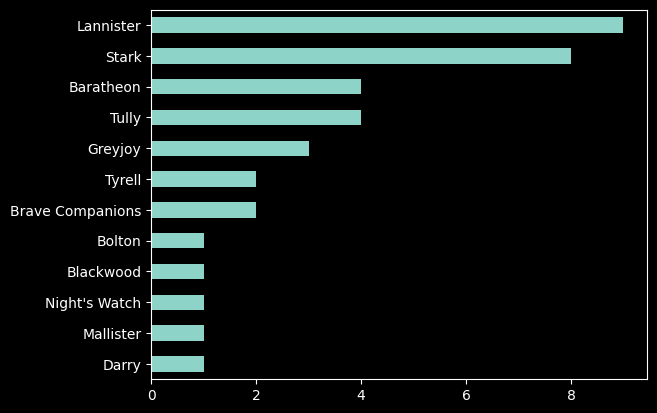

In [11]:
battles['defender_1'].value_counts(ascending=True).plot(kind='barh')

Let's see the frequency of battle outcome

<AxesSubplot:>

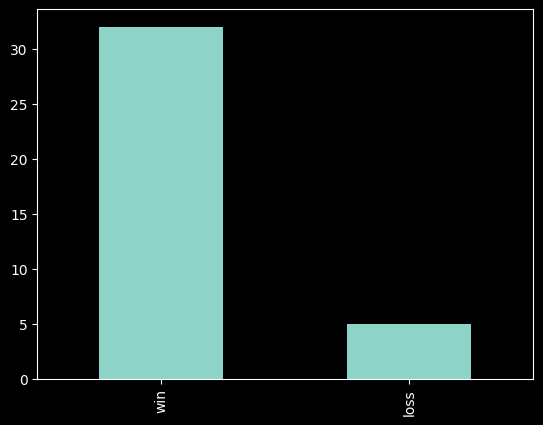

In [12]:
battles['attacker_outcome'].value_counts().plot(kind='bar')

How many battles was won during summer?

<AxesSubplot:>

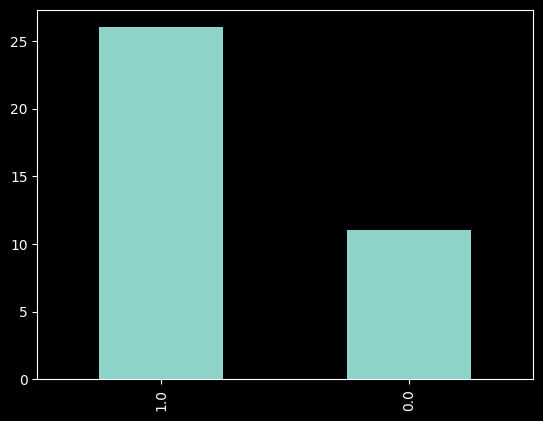

In [13]:
battles['summer'].value_counts().plot(kind='bar')

Which type of battle is mostly fought?

<AxesSubplot:>

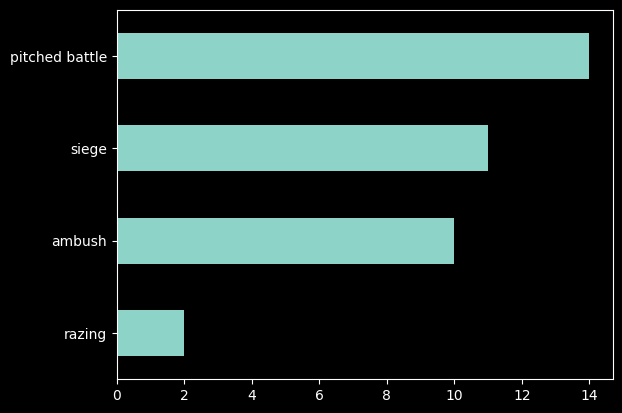

In [14]:
battles['battle_type'].value_counts(ascending=True).plot(kind='barh')

Let's see the distribution of regions in battles.

<AxesSubplot:>

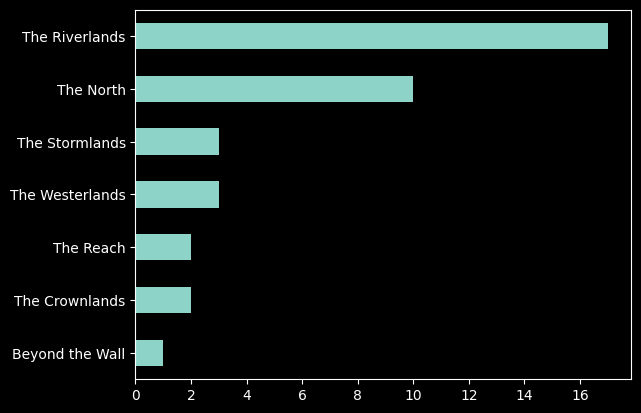

In [15]:
battles['region'].value_counts(ascending=True).plot(kind='barh')

Relationship between attacker size and defender size

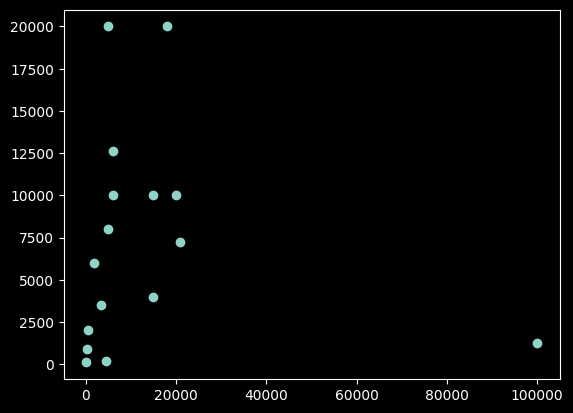

In [16]:
plt.scatter(battles.attacker_size, battles.defender_size)

### Characters Death Exploration

In [17]:
char_deaths.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


In [18]:
char_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


House of Allegiance frequency

<AxesSubplot:>

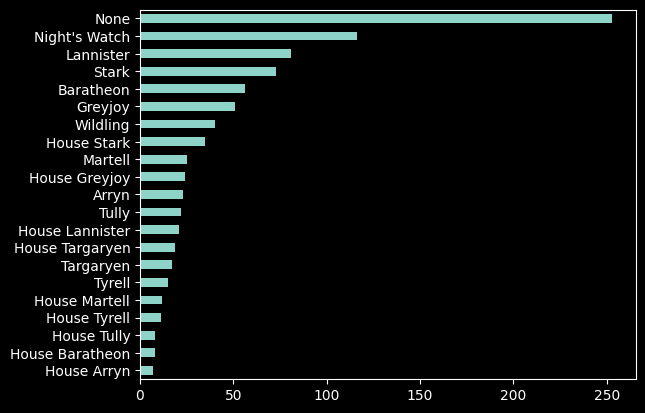

In [19]:
char_deaths.Allegiances.value_counts(ascending=True).plot(kind='barh')

Dead count based on gender

<AxesSubplot:>

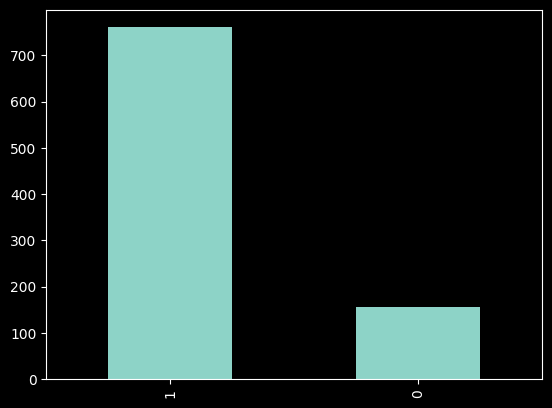

In [20]:
char_deaths.Gender.value_counts().plot(kind='bar')

### Characters Exploration

In [21]:
char_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [22]:
char_pred.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


There are negative value for date of birth. Negative mean for age.
Let's investigate that.

In [23]:
char_pred[char_pred['age'] < 0]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1684,1685,0,0,0.253,0.747,Doreah,NaN,0,Lysene,278279.0,299.0,NaN,NaN,NaN,House Targaryen,NaN,1,1,0,0,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0,0,0.110368,0
1868,1869,0,0,0.360,0.640,Rhaego,NaN,0,NaN,298299.0,298.0,NaN,NaN,NaN,House Targaryen,NaN,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,1,0,0.167224,0


<AxesSubplot:>

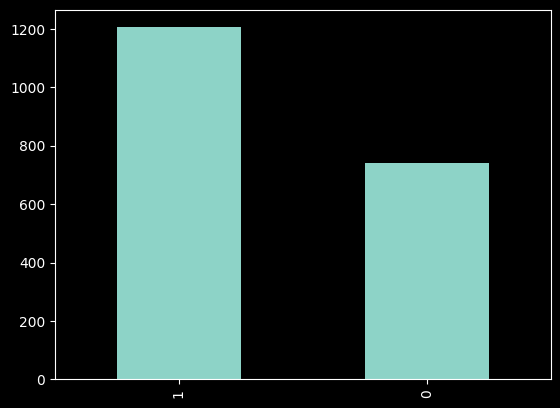

In [24]:
char_pred.male.value_counts().plot(kind='bar')

In [25]:
len(char_pred.culture.unique())

65

<AxesSubplot:>

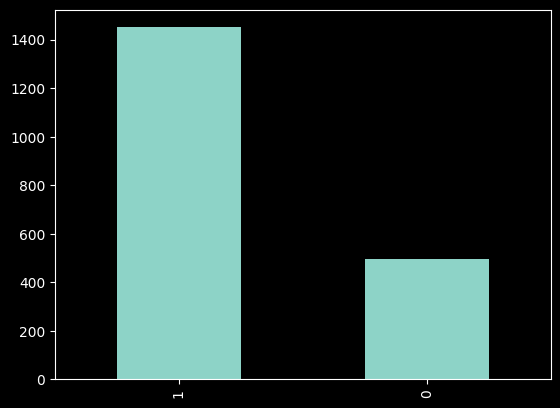

In [26]:
char_pred.isAlive.value_counts().plot(kind='bar')

## Data Wrangling/Cleaning

#### Cleaning Allegiance column

In [27]:
char_deaths['Allegiances'] = char_deaths['Allegiances'].str.replace('House ', '',)

<AxesSubplot:>

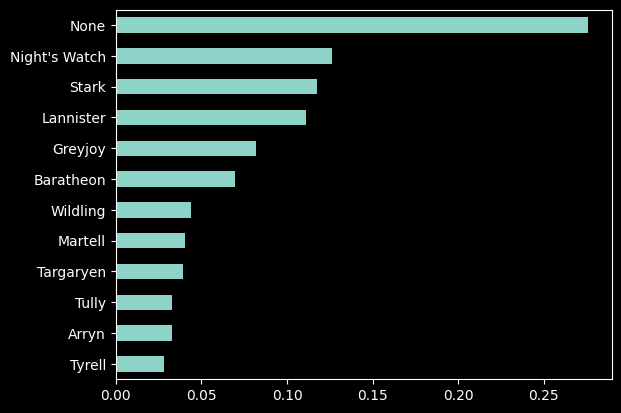

In [28]:
char_deaths['Allegiances'].value_counts(normalize=True, ascending=True).plot(kind='barh')


Research was made and according to [Fandom.com](https://gameofthrones.fandom.com/wiki/Doreah) Doreah is 25 years old.

According to [Fanthom.com](https://gameofthrones.fandom.com/wiki/Rhaego) Rhaego was never born.

In [29]:
# Replacing the age
char_pred.loc[1684, 'age'] = 25.0
char_pred.loc[1868, 'age'] = 0.0

## Feature engineering

### Variables For Creating Feature 

In [63]:
# Names of all Attackers
all_attackers = set(battles.attacker_1).union(set(battles.attacker_2))\
.union(set(battles.attacker_3)).union(set(battles.attacker_4))

In [64]:
# Names of all Defenders
all_defenders = set(battles.defender_1).union(set(battles.defender_2))

# Unique attackers and defenders combined
all_warlead = all_attackers.union(all_defenders)
all_warlead = list(all_warlead)
all_warlead.remove(np.nan)
renam_warlead = []
for x in all_warlead:
    house = 'House ' + x
    renam_warlead.append(house)
    
# renam_warlead

In [82]:
all_warlead

['Stark',
 'Lannister',
 'Baratheon',
 'Free folk',
 'Tully',
 'Brotherhood without Banners',
 'Glover',
 'Frey',
 'Mormont',
 'Mallister',
 'Bracken',
 'Tyrell',
 "Night's Watch",
 'Greyjoy',
 'Karstark',
 'Blackwood',
 'Darry',
 'Giants',
 'Thenns',
 'Brave Companions',
 'Bolton']

In [79]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [32]:
# All attacking commanders
all = []
for i in battles['attacker_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_att_commanders = set(all)

# All defending commanders
all = []
for i in battles['defender_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_def_commanders = set(all)

# All commanders 
all_commanders = all_att_commanders.union(all_def_commanders)

In [88]:
# all_commanders

In [33]:
# Charcters who died
a = char_pred[char_pred['name'].isin(char_deaths['Name'])]

In [34]:
# characters who swore allegiance
b = char_deaths[char_deaths['Allegiances'] != 'None']
c = char_pred[char_pred['name'].isin(b['Name'])]



In [35]:

# Characters whose house swore allegiance
d = char_pred[char_pred['house'].isin(c['house'])]

In [36]:
hus_char_with_allegnc = d['house']

In [37]:
husOfAllgnc = list(set(char_deaths['Allegiances']))
husOfAllgnc.remove('None')
renam_husOfAllgnc = []
for x in husOfAllgnc:
    house = 'House ' + x
    renam_husOfAllgnc.append(house)

In [38]:
renam_husOfAllgnc

['House Stark',
 'House Lannister',
 'House Baratheon',
 'House Arryn',
 'House Tully',
 'House Wildling',
 'House Martell',
 'House Targaryen',
 "House Night's Watch",
 'House Greyjoy',
 'House Tyrell']

In [39]:
death_prop = char_deaths['Allegiances'].value_counts(normalize=True, ascending=True).to_dict() 
death_prop

{'Tyrell': 0.028353326063249727,
 'Arryn': 0.03271537622682661,
 'Tully': 0.03271537622682661,
 'Targaryen': 0.03925845147219193,
 'Martell': 0.04034896401308615,
 'Wildling': 0.04362050163576881,
 'Baratheon': 0.0697928026172301,
 'Greyjoy': 0.08178844056706652,
 'Lannister': 0.11123227917121047,
 'Stark': 0.11777535441657579,
 "Night's Watch": 0.12649945474372956,
 'None': 0.27589967284623773}

In [40]:
death_perct_list = list(death_prop.values())
death_perct_list

[0.028353326063249727,
 0.03271537622682661,
 0.03271537622682661,
 0.03925845147219193,
 0.04034896401308615,
 0.04362050163576881,
 0.0697928026172301,
 0.08178844056706652,
 0.11123227917121047,
 0.11777535441657579,
 0.12649945474372956,
 0.27589967284623773]

### Cleaning Feature 

In [41]:
char = char_pred.copy()
orig = char_pred.copy()

In [42]:
char_pred = char.copy()

In [43]:
# Dropping column with 5% or more missing values

# Columns with less than 5% missing value except age
five_pct = char_pred.shape[0] * 0.05
missing = char_pred.isna().sum()
missing = missing[missing > five_pct]
missing.index[:-1]

Index(['title', 'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father',
       'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse'],
      dtype='object')

In [44]:
char_pred = char_pred.drop(missing.index[:-1], axis=1)

In [45]:
# Fill age with mean value
char_pred['age'] = char_pred['age'].fillna(round(char_pred['age'].mean()))

In [46]:
char_pred.isna().sum().value_counts()

0    20
dtype: int64

In [47]:
book_sum = char_pred[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)

In [48]:
char_pred.insert(7, 'books', book_sum)

## Models Before Feature Engineering

In [49]:
char = char_pred.copy()
char_pred = char.copy()

In [50]:
# Drop Redundant columns 
redundant_col = ['S.No', 'actual', 'pred', 'alive', 'plod', 'book1', 
                 'book2', 'book3', 'book4', 'book5', 'name']
char_pred1 = char_pred.drop(columns=redundant_col)

In [51]:
char_pred1

,male,books,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0,37.0,11,1,1,0.605351,0
1,1,5,1,1,97.0,1,1,1,0.896321,1
2,1,1,0,1,37.0,0,0,0,0.267559,1
3,0,0,1,1,23.0,0,0,0,0.183946,0
4,0,1,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...
1941,1,5,0,0,37.0,0,0,1,0.351171,0
1942,1,3,0,0,37.0,0,0,0,0.096990,0
1943,1,5,0,0,37.0,0,0,0,0.030100,1
1944,1,3,0,0,37.0,0,0,0,0.130435,1


In [52]:
normalized_data = (char_pred1 - char_pred1.mean())/(char_pred1.std())
normalized_data['isAlive'] = char_pred1['isAlive']
normalized_data.head()

,male,books,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0.783978,-1.316946,-0.406429,-0.924479,0.005405,7.727560,3.523394,3.989180,3.212131,0
1,0.783978,1.909920,2.459190,1.081135,4.935460,0.501655,3.523394,3.989180,5.024255,1
2,0.783978,-0.671573,-0.406429,1.081135,0.005405,-0.220936,-0.283671,-0.250549,1.108401,1
3,-1.274890,-1.316946,2.459190,1.081135,-1.144942,-0.220936,-0.283671,-0.250549,0.587676,0
4,-1.274890,-0.671573,2.459190,1.081135,-0.651936,-0.220936,-0.283671,-0.250549,-0.287143,1


In [53]:
round(char_pred1.shape[0]/2)

973

In [54]:
data = normalized_data.copy()

train = data[:973]
test = data[973:]

features = train.columns.tolist()
features.remove('isAlive')
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train[features], train['isAlive'])
pred = knn.predict(test[features])
mse = mean_squared_error(test['isAlive'], pred)
rmse = np.sqrt(mse)
print(mse, rmse)

0.22762589928057556 0.4771015607609931


In [55]:
hyper_params = [1, 2, 3, 4, 5,10, 20, 30, 60]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')

    knn.fit(train[features], train['isAlive'])
    pred = knn.predict(test[features])
    mse = mean_squared_error(test['isAlive'], pred)
    # rmse = np.sqrt(mse)
    # print(mse, rmse)
    mse_values.append(mse)
    
print(mse_values)
    

[0.29290853031860226, 0.24691675231243576, 0.2386662098892315, 0.2286742034943474, 0.22762589928057556, 0.21249743062692703, 0.21556269270298048, 0.21672262190247804, 0.2138880324311979]


In [56]:
# data1 = char_pred1[['male', 'isPopular', 'age', 'isAlive']]
# train1 = data1[:1362]
# test1 = data1[1362:]


# features1 = train1.columns.tolist()
# features1.remove('isAlive')
# lr = LinearRegression()
# lr.fit(train1[features1], train1['isAlive'])
# pred = knn.predict(test1[features1])
# mse = mean_squared_error(test1['isAlive'], pred)
# rmse = np.sqrt(mse)
# print(mse, rmse)

In [57]:
# data1 = char_pred1.copy()
# train1 = data1[:1362]
# test1 = data1[1362:]


# features = train1.columns.tolist()
# features.remove('isAlive')


# lr = LinearRegression()
# lr.fit(train1[features], train1['isAlive'])
# pred = knn.predict(test[features])
# mse = mean_squared_error(test1['isAlive'], pred)
# rmse = np.sqrt(mse)
# print(mse, rmse)

In [58]:
lgr = LogisticRegression()
lgr.fit(train[features], train['isAlive'])
predlgr = lgr.predict(test[features])
lgr.score(train[features], train['isAlive'])

0.8263103802672148

In [59]:
lgr.score(test[features], test['isAlive'])

0.7029804727646455

In [60]:
mse = mean_squared_error(test['isAlive'], predlgr)
rmse = np.sqrt(mse)
print(mse, rmse)

0.2970195272353546 0.5449949790918762


In [62]:
# lr.score(train[features], train['isAlive'])

In [ ]:
knn.score(train[features], train['isAlive'])

0.15048135451878975

In [ ]:
# numeric_train = train.select_dtypes(include=['integer', 'float'])
# numeric_test = test.select_dtypes(include=['integer', 'float'])

# features = numeric_train.columns.drop('isAlive')

### Creating Features

In [66]:
new = char_pred.copy()

In [67]:
redundant_col = ['S.No', 'actual', 'pred', 'alive', 'plod', 'book1', 
                 'book2', 'book3', 'book4', 'book5']
new = new.drop(columns=redundant_col)

In [68]:
new

,name,male,books,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Viserys II Targaryen,1,0,0,0,37.0,11,1,1,0.605351,0
1,Walder Frey,1,5,1,1,97.0,1,1,1,0.896321,1
2,Addison Hill,1,1,0,1,37.0,0,0,0,0.267559,1
3,Aemma Arryn,0,0,1,1,23.0,0,0,0,0.183946,0
4,Sylva Santagar,0,1,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...
1941,Luwin,1,5,0,0,37.0,0,0,1,0.351171,0
1942,Reek,1,3,0,0,37.0,0,0,0,0.096990,0
1943,Symeon Star-Eyes,1,5,0,0,37.0,0,0,0,0.030100,1
1944,Coldhands,1,3,0,0,37.0,0,0,0,0.130435,1


In [69]:
new['isACommander'] = np.where(new['name'].isin(all_commanders), 1, 0)


In [70]:
new[new['name'].isin(all_commanders)]

,name,male,books,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,isACommander
1,Walder Frey,1,5,1,1,97.0,1,1,1,0.896321,1,1
52,Leobald Tallhart,1,4,1,1,37.0,0,0,0,0.110368,0,1
101,Robb Stark,1,0,0,0,37.0,7,1,1,1.000000,0,1
169,Stafford Lannister,1,5,1,1,53.0,1,1,0,0.170569,0,1
172,Stannis Baratheon,1,0,0,0,37.0,4,1,1,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1850,Rolph Spicer,0,2,0,1,37.0,0,0,0,0.060201,1,1
1853,Sandor Clegane,1,5,0,0,30.0,1,1,1,0.695652,0,1
1879,Robett Glover,1,5,1,0,37.0,0,0,0,0.167224,1,1
1927,Loras Tyrell,1,5,0,1,23.0,2,1,1,0.665552,1,1


In [71]:
new['house'] = orig['house']
new['inHouseOfWarLead'] = np.where(new['house'].isin(all_warlead), 1, 0)

In [72]:
new['houseSworeAllegiance'] = np.where(new['house'].isin(hus_char_with_allegnc), 1, 0)

In [73]:
new['inHouseOfAllegnc'] = np.where(new['house'].isin(renam_husOfAllgnc), 1, 0)

In [74]:
# cond_list = [new['house'] == 'House Tyrell']

In [75]:
new1 = new.copy()

In [87]:
new1

,name,male,books,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,isACommander,house,inHouseOfWarLead,houseSworeAllegiance,inHouseOfAllegnc
0,Viserys II Targaryen,1,0,0,0,37.0,11,1,1,0.605351,0,0,NaN,0,1,0
1,Walder Frey,1,5,1,1,97.0,1,1,1,0.896321,1,1,House Frey,0,1,0
2,Addison Hill,1,1,0,1,37.0,0,0,0,0.267559,1,0,House Swyft,0,1,0
3,Aemma Arryn,0,0,1,1,23.0,0,0,0,0.183946,0,0,House Arryn,0,1,1
4,Sylva Santagar,0,1,1,1,29.0,0,0,0,0.043478,1,0,House Santagar,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,Luwin,1,5,0,0,37.0,0,0,1,0.351171,0,0,House Stark,0,1,1
1942,Reek,1,3,0,0,37.0,0,0,0,0.096990,0,0,House Bolton,0,1,0
1943,Symeon Star-Eyes,1,5,0,0,37.0,0,0,0,0.030100,1,0,NaN,0,1,0
1944,Coldhands,1,3,0,0,37.0,0,0,0,0.130435,1,0,Three-eyed crow,0,0,0


In [86]:
# new1['inHouseOfWarLead'].sample(10)

In [ ]:
new1 = new1.drop(columns=['name', 'house'])
new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   male                  1946 non-null   int64  
 1   books                 1946 non-null   int64  
 2   isMarried             1946 non-null   int64  
 3   isNoble               1946 non-null   int64  
 4   age                   1946 non-null   float64
 5   numDeadRelations      1946 non-null   int64  
 6   boolDeadRelations     1946 non-null   int64  
 7   isPopular             1946 non-null   int64  
 8   popularity            1946 non-null   float64
 9   isAlive               1946 non-null   int64  
 10  isACommander          1946 non-null   int32  
 11  inHouseOfWarLead      1946 non-null   int32  
 12  houseSworeAllegiance  1946 non-null   int32  
 13  inHouseOfAllegnc      1946 non-null   int32  
dtypes: float64(2), int32(4), int64(8)
memory usage: 182.6 KB


In [ ]:
data1 = new1.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

lgr = LogisticRegression(max_iter = 1000)
lgr.fit(train1[features], train1['isAlive'])
predlgr = lgr.predict(test1[features])
lgr.score(train1[features], train1['isAlive'])

0.8091042584434655

In [ ]:
lgr.score(test1[features], test1['isAlive'])

0.6712328767123288

In [ ]:
new.corr()['isAlive']

male                   -0.146982
books                   0.038919
isMarried              -0.050037
isNoble                -0.042211
age                    -0.136891
numDeadRelations       -0.192444
boolDeadRelations      -0.193736
isPopular              -0.153860
popularity             -0.183223
isAlive                 1.000000
isACommander           -0.057968
inHouseOfWarLead       -0.113636
houseSworeAllegiance   -0.024843
inHouseOfAllegnc       -0.113380
Name: isAlive, dtype: float64